# SpotifyAnalyzer - Data exploration
## Phase 1: Initial Data Exploration with Sample Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
%matplotlib inline

#Add path to find modules
import os
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
sys.path.append(os.path.abspath(os.path.join('..', '..')))

In [3]:
#Import data loader
from src.data_loader import load_sample_data

#Load data
personal_df, global_df = load_sample_data()


Successfully loaded existing sample data. ✅


In [4]:
#Examine data structure
print("-- PERSONAL DATA INFO --")
personal_df.info()

-- PERSONAL DATA INFO --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          500 non-null    object 
 1   energy            500 non-null    float64
 2   danceability      500 non-null    float64
 3   valence           500 non-null    float64
 4   tempo             500 non-null    float64
 5   acousticness      500 non-null    float64
 6   instrumentalness  500 non-null    float64
 7   liveness          500 non-null    float64
 8   speechiness       500 non-null    float64
 9   artist            500 non-null    object 
 10  album             500 non-null    object 
 11  genre             500 non-null    object 
 12  play_count        500 non-null    int64  
 13  skip_count        500 non-null    int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 54.8+ KB


In [5]:
print("-- FIRST 5 PERSONAL TRACKS --")
personal_df.head(5)

-- FIRST 5 PERSONAL TRACKS --


,track_id,energy,danceability,valence,tempo,acousticness,instrumentalness,liveness,speechiness,artist,album,genre,play_count,skip_count
0,track_0,0.615635,0.216124,0.493168,117.267724,0.292967,0.100537,0.267492,0.132174,artist_0,album_0,Jazz,9,1
1,track_1,0.499997,0.814516,0.342396,114.877601,0.152799,0.010947,0.220870,0.428303,artist_1,album_1,Pop,6,5
2,track_2,0.618608,0.598247,0.171696,47.812855,0.035241,0.084901,0.509116,0.060930,artist_2,album_2,Hip-Hop,6,0
3,track_3,0.314110,0.481769,0.884773,76.299557,0.045433,0.199591,0.119168,0.128507,artist_3,album_3,Rock,12,3
4,track_4,0.902516,0.200515,0.271091,107.352178,0.585286,0.160940,0.409191,0.049553,artist_4,album_4,Hip-Hop,8,0


In [6]:
#Audio features statistics
audio_features = ['energy', 'danceability', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
personal_df[audio_features].describe()

,energy,danceability,valence,tempo,acousticness,instrumentalness,liveness,speechiness
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.508013,0.497935,0.510096,117.803334,0.235125,0.164524,0.204635,0.196003
std,0.213732,0.219936,0.223847,32.196103,0.186653,0.136221,0.161735,0.155469
min,0.029215,0.008561,0.032495,13.834268,0.000085,0.000039,0.001348,0.000683
25%,0.349198,0.335235,0.341512,97.447684,0.085931,0.060222,0.073517,0.062438
50%,0.526100,0.491623,0.519721,118.323157,0.191742,0.129455,0.168922,0.155941
75%,0.670489,0.658168,0.674457,138.457986,0.340884,0.236622,0.288199,0.301016
max,0.981233,0.969604,0.987478,212.696688,0.914162,0.696626,0.735451,0.754646


In [7]:
#Compare average listening data
personal_means = personal_df[audio_features].mean()
global_means = global_df[audio_features].mean()

#Create new dataframe to compare
compare_df = pd.DataFrame({'Personal': personal_means, 'Global': global_means, 'Difference': personal_means - global_means})

print("-- PERSONAL DATA VS GLOBAL DATA --")
compare_df.round(3)

-- PERSONAL DATA VS GLOBAL DATA --


,Personal,Global,Difference
energy,0.508,0.522,-0.014
danceability,0.498,0.292,0.206
valence,0.510,0.502,0.008
tempo,117.803,119.244,-1.441
acousticness,0.235,0.715,-0.480
instrumentalness,0.165,0.721,-0.556
liveness,0.205,0.277,-0.072
speechiness,0.196,0.282,-0.086


In [13]:
#Compare genre preferences
print("-- PERSONAL GENRE DISTRIBUTION --")
print(personal_df['genre'].value_counts())

print("-- GLOBAL GENRE DISTRIBUTION --")
print(global_df['genre'].value_counts())

-- PERSONAL GENRE DISTRIBUTION --
genre
Pop           144
Rock          111
Hip-Hop        80
Electronic     62
Indie          52
Jazz           51
Name: count, dtype: int64
-- GLOBAL GENRE DISTRIBUTION --
genre
Pop           386
Rock          164
Hip-Hop       144
Indie         112
Jazz          104
Electronic     90
Name: count, dtype: int64


In [8]:
#Deeper dive into personal music taste
print("-- MUSIC TASTE ANALYSIS --")
print("Your Music DNA:")
for feature in audio_features:
    personal_average = personal_df[feature].mean()
    global_average = global_df[feature].mean()
    difference = personal_average - global_average

    if difference > 0:
        print(f"You listen to {feature} more than the global average by {difference:.2f}.")
    elif difference < 0:
        print(f"You listen to {feature} less than the global average by {-difference:.2f}.")

-- MUSIC TASTE ANALYSIS --
Your Music DNA:
You listen to energy less than the global average by 0.01.
You listen to danceability more than the global average by 0.21.
You listen to valence more than the global average by 0.01.
You listen to tempo less than the global average by 1.44.
You listen to acousticness less than the global average by 0.48.
You listen to instrumentalness less than the global average by 0.56.
You listen to liveness less than the global average by 0.07.
You listen to speechiness less than the global average by 0.09.


In [14]:
#Analyze listening habits
print("-- LISTENING HABITS ANALYSIS --")
print(f"Total tracks listened to: {len(personal_df)}")
print(f"Number of Unique artists: {personal_df['artist'].nunique()}")
print(f"Unique genres: {personal_df['genre'].nunique()}")
print(f"Most played track: {personal_df['play_count'].max()} plays")
print(f"Average plays per track: {personal_df['play_count'].mean():.1f}")

-- LISTENING HABITS ANALYSIS --
Total tracks listened to: 500
Number of Unique artists: 50
Unique genres: 6
Most played track: 16 plays
Average plays per track: 6.1


In [9]:
print(f"-- Your Genre Diversity --")
genre_diversity = personal_df['genre'].nunique() / len(personal_df) * 100
global_genre_diversity = global_df['genre'].nunique() / len(global_df) * 100
if genre_diversity > global_genre_diversity:
    print(f"You explore {genre_diversity:.1f}% of genres, which is higher than the global average of {global_genre_diversity:.1f}%.")
else:
    print(f"You explore {genre_diversity:.1f}% of genres, which is lower than the global average of {global_genre_diversity:.1f}%.")

-- Your Genre Diversity --
You explore 1.2% of genres, which is higher than the global average of 0.6%.


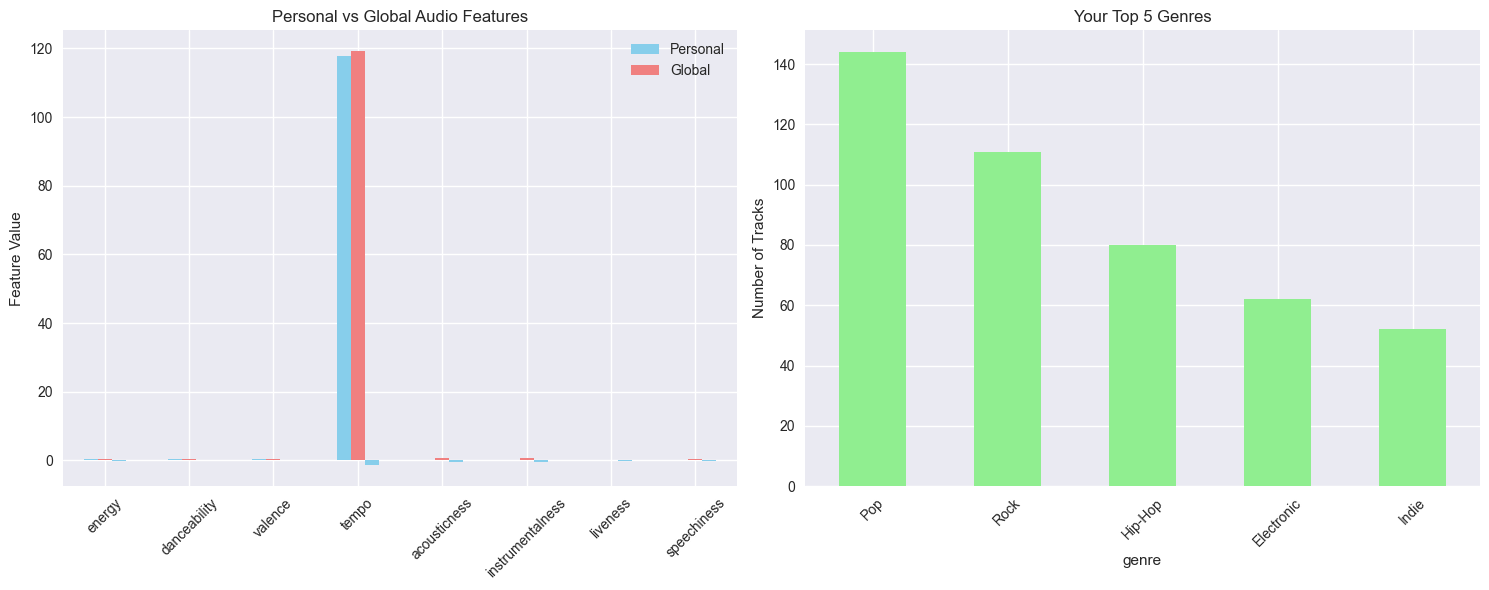

In [24]:
# Simple comparison bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Audio features comparison
compare_df.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Personal vs Global Audio Features')
ax1.set_ylabel('Feature Value')
ax1.legend(['Personal', 'Global'])
ax1.tick_params(axis='x', rotation=45)

# Genre comparison
personal_genres = personal_df['genre'].value_counts()
personal_genres.head(5).plot(kind='bar', ax=ax2, color='lightgreen')
ax2.set_title('Your Top 5 Genres')
ax2.set_ylabel('Number of Tracks')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [25]:
personal_df.head()

,track_id,energy,danceability,valence,tempo,acousticness,instrumentalness,liveness,speechiness,artist,album,genre,play_count,skip_count
0,track_0,0.615635,0.216124,0.493168,117.267724,0.292967,0.100537,0.267492,0.132174,artist_0,album_0,Jazz,9,1
1,track_1,0.499997,0.814516,0.342396,114.877601,0.152799,0.010947,0.220870,0.428303,artist_1,album_1,Pop,6,5
2,track_2,0.618608,0.598247,0.171696,47.812855,0.035241,0.084901,0.509116,0.060930,artist_2,album_2,Hip-Hop,6,0
3,track_3,0.314110,0.481769,0.884773,76.299557,0.045433,0.199591,0.119168,0.128507,artist_3,album_3,Rock,12,3
4,track_4,0.902516,0.200515,0.271091,107.352178,0.585286,0.160940,0.409191,0.049553,artist_4,album_4,Hip-Hop,8,0


In [11]:
import plotly.graph_objects as go
features = ['energy', 'danceability', 'valence', 'acousticness']
personal_values = [personal_df[feature].mean() for feature in features]
global_values = [global_df[feature].mean() for feature in features]

#Create radar chart
fig = go.Figure()

#add personal data
fig.add_trace(go.Scatterpolar(
    r = personal_values,
    theta=features,
    fill ='toself',
    name='Your Music',
    line_color='rgba(255, 99, 132, 0.8)',
    fillcolor='rgba(255, 99, 132, 0.3)'
))
#add global data
fig.add_trace(go.Scatterpolar(
    r = global_values,
    theta=features,
    fill ='toself',
    name='Global Music',
    line_color='rgba(54, 162, 235, 0.8)',
    fillcolor='rgba(54, 162, 235, 0.3)'
))
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    title='Your Music vs Global Music',
    template='plotly_white'
)
# Show the radar chart
fig.show()



# Phase 2: Exploration with Real Data


In [1]:
#Import necessary libraries
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

#Download Spotify dataset from Kaggle
source = r"/Users/mai-annie/Downloads/kaggle.json"
destination = os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json")

#Check if source file exists before attempting to move it
if os.path.exists(source):
    #Create .kaggle folder if it doesn't exist
    os.makedirs(os.path.dirname(destination), exist_ok=True)

    #Move the kaggle.json file to the .kaggle folder
    shutil.move(source, destination)
    print("Kaggle credentials set up successfully.")
else:
    print(f"Error: Source file not found at {source}")
    print("Please check if the file path is correct and the file exists.")

Error: Source file not found at /Users/mai-annie/Downloads/kaggle.json
Please check if the file path is correct and the file exists.


In [7]:
!kaggle datasets download -d maharshipandya/-spotify-tracks-dataset

Dataset URL: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
License(s): ODbL-1.0
-spotify-tracks-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import zipfile
with zipfile.ZipFile("-spotify-tracks-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("-spotify-tracks-dataset")

In [9]:
print(os.listdir("-spotify-tracks-dataset"))

['dataset.csv']


In [19]:
#Read the Spotify dataset
df = pd.read_csv("-spotify-tracks-dataset/dataset.csv", index_col=0)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [8]:
df.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [9]:
df.describe(include='object')

,track_id,artists,album_name,track_name,track_genre
count,114000,113999,113999,113999,114000
unique,89741,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


In [11]:
#Check all column names
print("Columns:", df.columns.tolist())

#Check data types
print(df.dtypes)

Columns: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [20]:
# Missing value counts
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
}).sort_values('Missing_Percent', ascending=False)

print(missing_summary)


                  Missing_Count  Missing_Percent
album_name                    1         0.000877
track_name                    1         0.000877
artists                       1         0.000877
track_id                      0         0.000000
speechiness                   0         0.000000
time_signature                0         0.000000
tempo                         0         0.000000
valence                       0         0.000000
liveness                      0         0.000000
instrumentalness              0         0.000000
acousticness                  0         0.000000
loudness                      0         0.000000
mode                          0         0.000000
key                           0         0.000000
energy                        0         0.000000
danceability                  0         0.000000
explicit                      0         0.000000
duration_ms                   0         0.000000
popularity                    0         0.000000
track_genre         

In [22]:
#Check for duplicate column names
print("Duplicate columns:", df.columns[df.columns.duplicated()].tolist())

#Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

#Check for duplicate songs
if 'artist' in df.columns and 'track_name' in df.columns:
    duplicate_songs = df.duplicated(subset=['artist', 'track_name']).sum()
    print(f"Duplicate songs: {duplicate_songs}")

Duplicate columns: []
Duplicate rows: 450


In [23]:
#Check if audio features are between 0-1
audio_features = ['energy', 'danceability', 'valence', 'acousticness', 
                  'instrumentalness', 'liveness', 'speechiness']

for feature in audio_features:
    if feature in df.columns:
        out_of_range = ((df[feature] < 0) | (df[feature] > 1)).sum()
        print(f"{feature}: {out_of_range} values out of 0-1 range")

energy: 0 values out of 0-1 range
danceability: 0 values out of 0-1 range
valence: 0 values out of 0-1 range
acousticness: 0 values out of 0-1 range
instrumentalness: 0 values out of 0-1 range
liveness: 0 values out of 0-1 range
speechiness: 0 values out of 0-1 range
